<a href="https://colab.research.google.com/github/edmenciab733/ecc_qiskit_fallfest/blob/main/challenge_qosf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit_optimization

# Propuesta de solución para el challenge de la QOSF

##  Challenge / Desafio
English: For this problem you have the following situation: you are playing a game of tic-tac-toe, and you find the situation in the figure below, next is your turn, develop a quantum algorithm to be able to find the best decisions with higher probability.

Español: Para este problema tienes la siguiente situación: estás jugando un juego de tres en línea (tatetí), y te encuentras con la situación en la figura a continuación, a continuación es tu turno, desarrolla un algoritmo cuántico para poder encontrar las mejores decisiones con mayor probabilidad.

<img src="https://raw.githubusercontent.com/fall-fest-latino/escuela-de-computacion-cuantica-2023/47a4bb1971536270375a17ce1c5e0aa74d801c73/challenges/QOSF%20challenge/media/image10.png" style="max-width: 30%;height: auto;" />
<center> Gráfica de <a href="https://github.com/MaldoAlberto"> Alberto Maldonado  </center>

In [ ]:
tic_tac_toe_board = [
    ['1', '2', '2'],
    ['1', '0', '0'],
    ['2', '0', '0']
]

flattened_list = [item for row in tic_tac_toe_board for item in row]
print(flattened_list)

['1', '2', '2', '1', '0', '0', '2', '0', '0']



## Solution Proposal /Propuesta de solución

English: Given the current situation and the challenges we face, the strategy does not focus on the rules of the game itself, but rather on identifying those variables that increase our chances of success within it. The goal is to discover specific states that, with a high probability, will lead us to victory. In this context, the decision was made to implement Grover's algorithm. This choice is due to its ability to efficiently search within a set of possible solutions, reducing the required time to approximately
$O(\sqrt{N})$, which makes it considerably fast for this purpose.

Español: Dada la situación presente y los retos que enfrentamos, la estrategia no se centra en las reglas del juego en sí, sino en identificar aquellas variables que aumenten nuestras chances de éxito dentro del mismo. El objetivo es descubrir estados específicos que, con alta probabilidad, nos conduzcan a la victoria. En este contexto, se optó por implementar el algoritmo de Grover. Esta elección se debe a su capacidad de realizar búsquedas dentro de un conjunto de posibles soluciones de manera eficiente, reduciendo el tiempo requerido a aproximadamente el $O(\sqrt{N})$, lo que lo hace considerablemente rápido para este propósito.


A classic solution includes $O({N})$ / Una solución clasica incluye $O({N})$
```
def busqueda_lineal(arreglo, objetivo):

    for indice, elemento in enumerate(arreglo):
        if elemento == objetivo:
            return indice  # Elemento encontrado, retorna la posición
    return -1  # El elemento no está en el arreglo

# Ejemplo de uso
arreglo = [3, 5, 2, 1, 4]
objetivo = 1

# Llamada a la función
indice_objetivo = busqueda_lineal(arreglo, objetivo)

if indice_objetivo != -1:
    print(f"Elemento encontrado en el índice {indice_objetivo}.")
else:
    print("Elemento no encontrado.")

```

## Implementation / Implementación

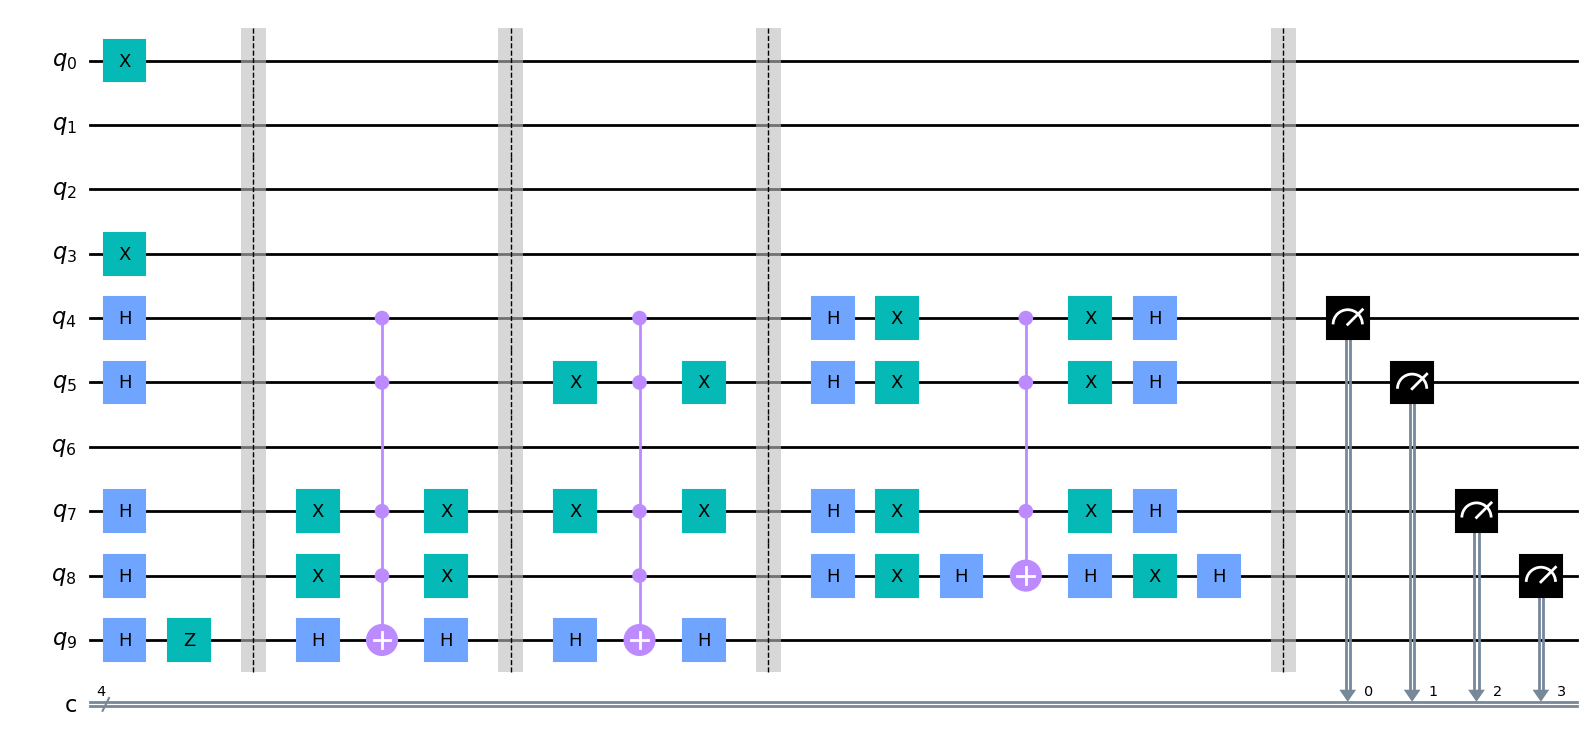

In [ ]:
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import C3XGate, C4XGate

qubits = 10
qc = QuantumCircuit(qubits, 4)  # 8 bits clásicos para las 8 posibles líneas de victoria

# Qubits de Entrada
qc.x(0)
qc.x(3)
for i in [4, 5, 7, 8]:
    qc.h(i)
qc.h(qubits-1)
qc.z(qubits-1)
qc.barrier()
qc.x(7)
qc.x(8)
qc.h(9)

qc.append(C4XGate(), [4, 5, 7, 8, 9])
qc.x(7)
qc.x(8)
qc.h(9)
qc.barrier()
qc.x(5)
qc.x(7)
qc.h(9)
qc.append(C4XGate(), [4, 5, 7, 8, 9])
qc.x(5)
qc.x(7)
qc.h(9)
qc.barrier()

for i in [4, 5, 7, 8]:
    qc.h(i)

for i in [4, 5, 7, 8]:
    qc.x(i)
qc.h(8)
qc.append(C3XGate(), [4, 5, 7, 8])
qc.h(8)
for i in [4, 5, 7, 8]:
    qc.x(i)
for i in [4, 5, 7, 8]:
    qc.h(i)
qc.barrier()

qc.measure(4, 0)
qc.measure(5, 1)
qc.measure(7, 2)
qc.measure(8, 3)
# Dibujar el circuito
qc.draw('mpl')


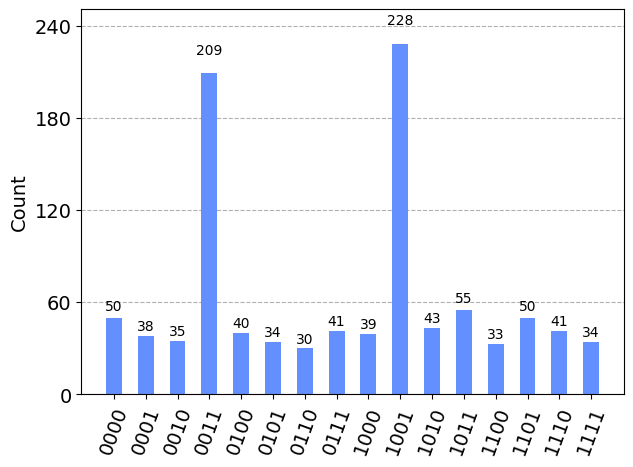

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

Explanation of the Circuit /Explicación del circuito.

English: In the circuit, we have started with 10 qubits, 9 to represent the number of elements of the flattened vector. However, all those states that are already occupied are maintained only in those states; this is done to represent the complete state of the system and to explore its possible solutions. To optimize the number of qubits, a circuit should be built that includes only those available spaces. In this example, there are only 4. From there, the implementation of Grover's algorithm is applied. The first step is to put the empty states into a state of superposition. Subsequently, the oracle indicates the states that allow obtaining a winning solution, which in this case are the states |1001> and |1100>, which represent the sequence of the empty spaces.

Español: En el circuito se ha comenzado con 10 qubits, 9 para representar la cantidad de elementos del vector aplanado. Sin embargo, todos aquellos estados que ya están ocupados se mantienen únicamente en dichos estados; esto se hace para representar el estado completo del sistema y explorar sus posibles soluciones. Para optimizar el número de qubits, se debería construir un circuito que incluya solamente aquellos espacios disponibles. En este ejemplo, son solo 4. A partir de ahí, se aplica la implementación del algoritmo de Grover. El primer paso es poner en estado de superposición los estados vacíos. Posteriormente, el oráculo señala los estados que permiten obtener una solución ganadora, que en este caso son los estados |1001> y |1100>, los cuales representan la secuencia de los espacios vacíos.

```
['1', '2', '2', '1', '0', '0', '2', '0', '0']
# index of the empty spaces / índice de los espacios vacios
[4,5,7,8]
#translate those spaces into /traducir esos espacios en
[0,1,2,3]
#Which are the spaces that are the solution space that ranges from |0000> to |1111> / Que son los espacios que es el espacios de soluciones que va desde |0000> a |1111>
```

English: As for the ancilla qubit, we use it as part of the implementation of Grover's algorithm to mark the states of interest.

Español: En cuanto al qubit ancila, lo utilizamos como parte de la implementación del algoritmo de Grover para marcar los estados de interés.

##  Bonus

## Challenges / Desafio

English: What if we start one step earlier and your opponent has not chosen yet, as shown in the following image, it shows with higher probability the chances of you winning. Please refer to the above considerations.

Español: Qué tal si comenzamos un paso antes y tu oponente aún no ha elegido, como se muestra en la siguiente imagen, esta muestra con mayor probabilidad las chances de que tú ganes. Por favor, ten en cuenta las consideraciones anteriores.




In [ ]:
tic_tac_toe_board = [
    ['1', '2', '2'],
    ['1', '0', '0'],
    ['0', '0', '0']
]

flattened_list = [item for row in tic_tac_toe_board for item in row]
print(flattened_list)

## Solution Proposal / Propuesta de solución
English: In the game of tic-tac-toe, the goal is to align three of your symbols, either circles or crosses, in a horizontal, vertical, or diagonal line. The first to achieve this wins the game. Currently, it is the opponent's turn. The strategy involves anticipating and countering their move, which will likely aim to prevent my victory. By analyzing the state of the game, it is foreseeable that the opponent's most obvious move would be to place their symbol in the third row, first column, thus blocking my potentially winning line

Español: En el juego de tateti, también conocido tic-tac-toe, el objetivo es alinear tres de tus propias marcas, ya sean círculos o cruces, en una fila, columna o diagonal. Quien logra esto primero es el ganador. En la situación actual, le toca jugar a mi oponente. La estrategia a seguir implica anticipar y bloquear su jugada, la cual probablemente estará dirigida a obstaculizar mi posibilidad de ganar. Con base en el análisis del tablero, el movimiento más previsible para el oponente sería colocar su marca en la fila tres, columna uno, para interrumpir mi secuencia ganadora. A partir de su movimiento más previsible. Tengo dos jugadas ganadores explicadas ya en el circuito anterior.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


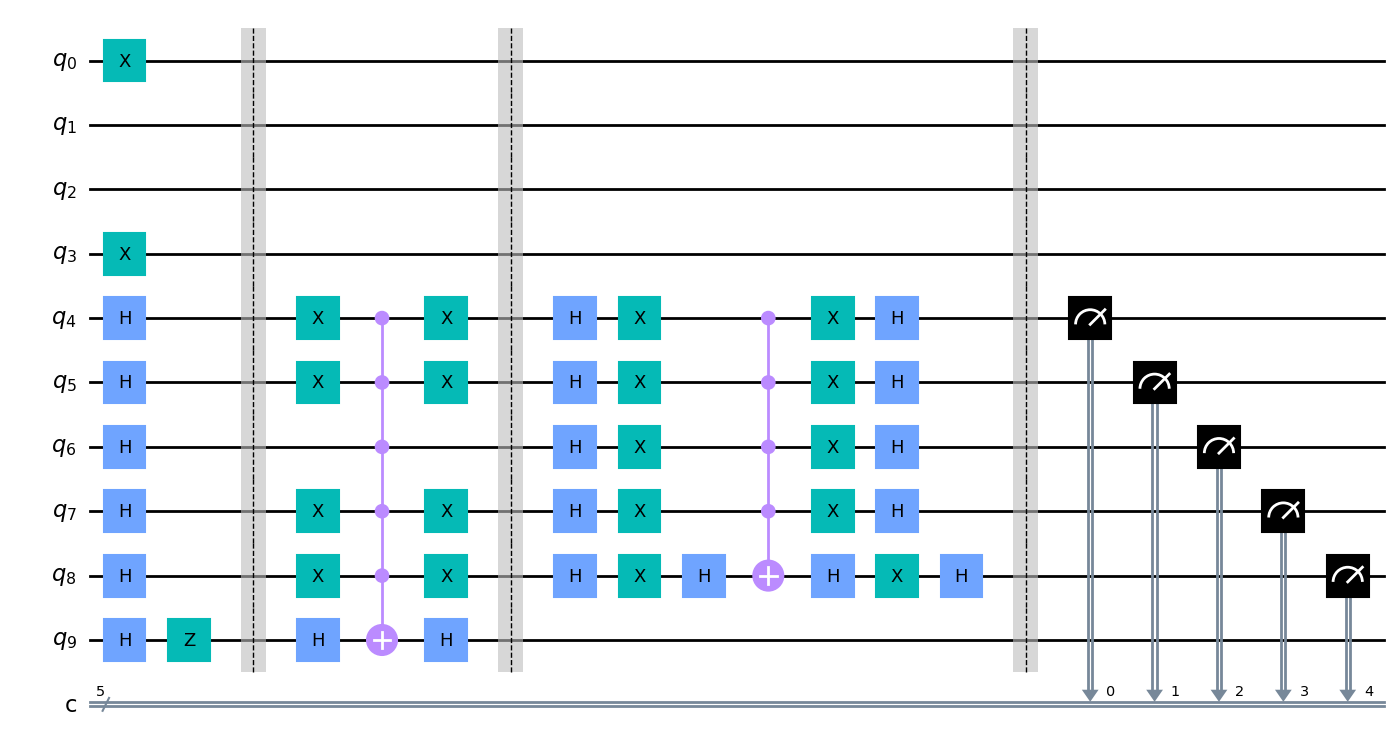

In [ ]:
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

from qiskit.circuit.library import MCXGate, C4XGate

qubits = 10
qc = QuantumCircuit(qubits, 5)  # 8 bits clásicos para las 8 posibles líneas de victoria

# Qubits de Entrada
qc.x(0)
qc.x(3)
for i in [4, 5, 6 ,7, 8]:
    qc.h(i)
qc.h(qubits-1)
qc.z(qubits-1)
qc.barrier()

qc.x([4,5,7,8])
qc.h(9)


gate = MCXGate(5)
qc.append(gate, [4, 5, 6,7, 8, 9])

qc.x([4,5,7,8])
qc.h(9)

qc.barrier()

for i in [4, 5, 6 ,7, 8]:
    qc.h(i)

for i in  [4, 5, 6 ,7, 8]:
    qc.x(i)
qc.h(8)
qc.append(C4XGate(), [4, 5, 6, 7, 8])
qc.h(8)
for i in [4, 5,6 ,7, 8]:
    qc.x(i)
for i in [4, 5,6, 7, 8]:
    qc.h(i)
qc.barrier()



qc.measure(4, 0)
qc.measure(5, 1)
qc.measure(6, 2)
qc.measure(7, 3)
qc.measure(8, 4)
# Dibujar el circuito
qc.draw('mpl')


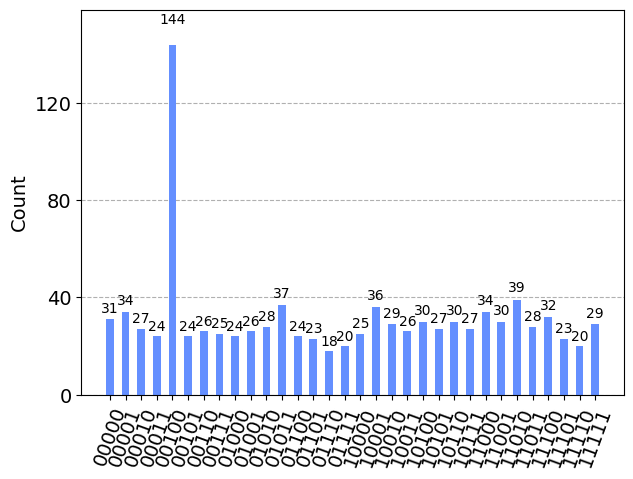

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)

plot_histogram(counts)

#Conclusiones el tictatoe y el algoritmo de Grover

English: It is a relevant solution, considering that Grover's algorithm operates in a manner similar to the mental analysis performed during the game. When analyzing moves, the player does not iteratively review the possibilities of victory. Instead, they take a glance at all available options and, from that point, emphasize those that are identified according to the pattern. It is possible that some alternatives might be overlooked during this analysis, but through a global analysis approach, they are able to draw conclusions; that is, they highlight those plays that make achieving their goal easier.

Español: Es una solución pertinente, considerando que el algoritmo de Grover opera de manera análoga al análisis mental realizado durante el juego. Al analizar los movimientos, el jugador no revisa iterativamente las posibilidades de victoria. Más bien, observa de un solo vistazo todas las opciones disponibles y, desde ese punto, realza aquellas que identifica conforme al patrón. Puede que durante este análisis se le pase por alto alguna alternativa, pero mediante un enfoque de análisis global, es capaz de extraer conclusiones; es decir, resalta aquellas jugadas que le faciliten la consecución de su objetivo.